In [1]:
    import pandas as pd
    irisData=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [2]:
irisData.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
head_cols=['sep_len', 'sep_wid', 'pet_len', 'pet_wid', 'class']
irisData.columns=head_cols
#irisData.head()

In [4]:
irisData.dropna(how='all', inplace='True')
irisData.tail()

,sep_len,sep_wid,pet_len,pet_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
irisData['class_cat']=irisData['class'].astype('category')
irisData['class_codes']=irisData['class_cat'].cat.codes
#irisData.tail()


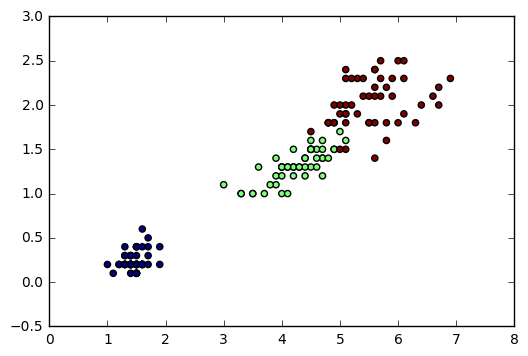

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
#Scattering raw data
plt.scatter(irisData['pet_len'], irisData['pet_wid'], c=irisData.class_codes)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000137028AE278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000013703F74A90>]], dtype=object)

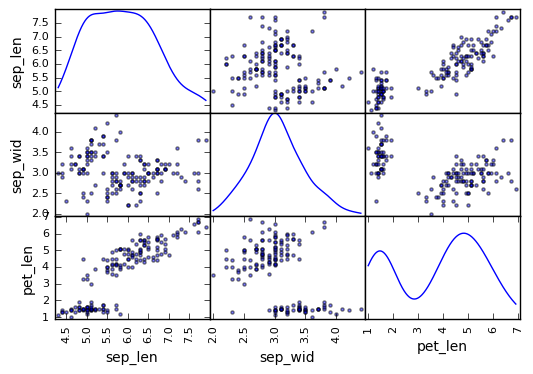

In [8]:
from pandas.tools.plotting import scatter_matrix

#Visualize scatter to screen for covariance
scatter_matrix(irisData.ix[:, 0:3], alpha=0.5, diagonal='kde')

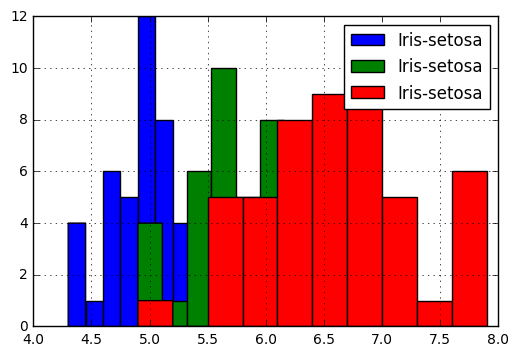

In [10]:
#### Plot histogram after grouping according to species(class)

irisData.groupby(irisData['class']).sep_len.hist(label=list(irisData.class_cat))
plt.legend()

In [14]:
#standardizing
'''
Whether to standardize the data prior to a PCA on the covariance matrix depends 
on the measurement scales of the original features. Since PCA yields a feature 
subspace that maximizes the variance along the axes, it makes sense to standardize 
the data, especially, if it was measured on different scales.
http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html

Standardization is a useful technique to transform attributes with a Gaussian distribution 
and differing means and standard deviations to a standard Gaussian distribution with a mean 
of 0 and a standard deviation of 1.
http://machinelearningmastery.com/prepare-data-machine-learning-python-scikit-learn/
'''
from sklearn.preprocessing import StandardScaler

#split into features and target
#create a 2d numpy array without heading from datafeame
X=irisData.ix[:, 0:4].values
#X
y=irisData.ix[:, 4]
#y
X_std=StandardScaler().fit_transform(X)
#X_std=StandardScaler().fit(X)  #this gives:  StandardScaler(copy=True, with_mean=True, with_std=True)
#X_std

In [15]:
#irisData.describe()
#X

In [16]:
import numpy as np

#finding the mean vector
mean_vec=np.mean(X_std, axis=0)
mean_vec

array([ -4.73695157e-16,  -6.63173220e-16,   3.31586610e-16,
        -2.84217094e-16])

In [17]:
X_std.mean(axis=0) #equivalen ways of taking mean across all the columns

array([ -4.73695157e-16,  -6.63173220e-16,   3.31586610e-16,
        -2.84217094e-16])

In [18]:
#(X_std - mean_vec).T

In [19]:
#http://stattrek.com/matrix-algebra/covariance-matrix.aspx
#Cov(X, Y) = Σ ( Xi - X ) ( Yi - Y ) / N = Σ xiyi / N
#Transform the raw scores from matrix X into deviation scores for matrix x.   x = X - 11'X ( 1 / n )
#Then, divide each term in the deviation sums of squares and cross product matrix by n to create the variance-covariance matrix. 
#That is,  V = x'x ( 1 / n )

In [20]:
#Find the covariance matrix for four features - a 4x4 matrix gives variance - covariance
#Can easily find std and correlation from this matrix
cov_mat=(X_std - mean_vec).T.dot((X_std - mean_vec))/(X_std.shape[0]-1)
print("Cov matrix \n {}".format(cov_mat))

Cov matrix 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [21]:
np.cov(X_std.T)   #gives same result

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [22]:
#Finding eigen vectors and respective eigen values
eig_vals, eig_vecs =np.linalg.eig(cov_mat)
print('Eig_vals \n {}'.format(eig_vals))
print('Eig_vals \n {}'.format(eig_vecs))

Eig_vals 
 [ 2.93035378  0.92740362  0.14834223  0.02074601]
Eig_vals 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [23]:
#Using cor coeff
cor_mat1=np.corrcoef(X_std.T)
eig_vals1, eig_vecs1 =np.linalg.eig(cor_mat1)
print('Eig_vals \n {}'.format(eig_vals1))
print('Eig_vals \n {}'.format(eig_vecs1))

Eig_vals 
 [ 2.91081808  0.92122093  0.14735328  0.02060771]
Eig_vals 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [24]:
#Eigendecomposition of the raw data based on the correlation matrix:
cor_mat2 = np.corrcoef(X.T)
eig_vals2, eig_vecs2 =np.linalg.eig(cor_mat2)
print('Eig_vals \n {}'.format(eig_vals2))
print('Eig_vals \n {}'.format(eig_vecs2))


Eig_vals 
 [ 2.91081808  0.92122093  0.14735328  0.02060771]
Eig_vals 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [25]:
'''
Singular Vector Decomposition

While the eigendecomposition of the covariance or correlation matrix may be more 
intuitiuve, most PCA implementations perform a Singular Vector Decomposition (SVD) 
to improve the computational efficiency. So, let us perform an SVD to confirm that 
the result are indeed the same:
http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html
'''
u, s, v = np.linalg.svd(X_std.T)
u

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [26]:
'''
eigenvectors only define the directions of the new axis, since they have 
all the same unit length 1, which can confirmed by the following two lines of code:
'''
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [27]:
#Selecting Principal Components
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])


Eigenvalues in descending order:
2.93035377559
0.927403621517
0.148342226482
0.0207460139956


In [28]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [29]:
cum_var_exp

array([  72.77045209,   95.80097536,   99.48480732,  100.        ])

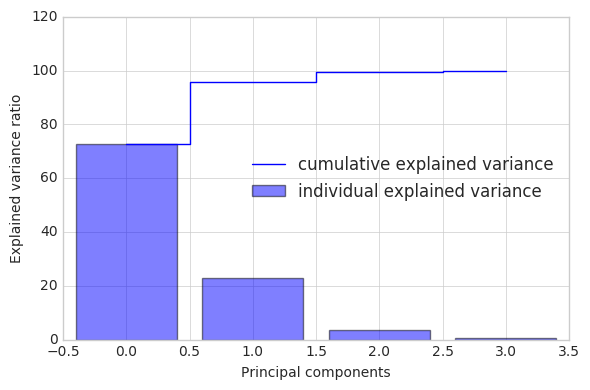

In [30]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

Note: From above 2 eigen val explains 95% of variance and hence 2 corresponding eigen vectors would be best to select

In [31]:
#Projection matrix
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [33]:
#predicted 
Y = X_std.dot(matrix_w)
Y[:3]  #first 3 pairs values

array([[-2.26454173, -0.5057039 ],
       [-2.0864255 ,  0.65540473],
       [-2.36795045,  0.31847731]])

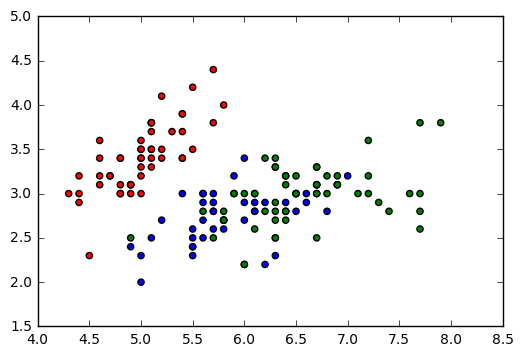

In [48]:
#Scatter plot of raw data
irisData['color_codes']=['red' if x==0 else 'blue' if x==1 else 'green' for x in irisData['class_codes']]
plt.scatter(irisData.sep_len, irisData.sep_wid, c=irisData['color_codes'])

In [59]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [60]:
diff=(Y_sklearn[:, 0]-Y[:, 0])<0.0001
diff
#Y_skearn and Y are the same

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

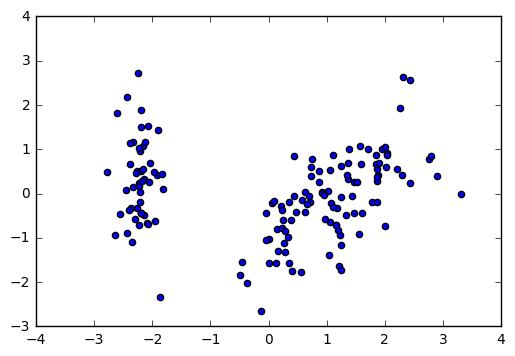

In [64]:
#Scattering Y_sklean pairs
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1])

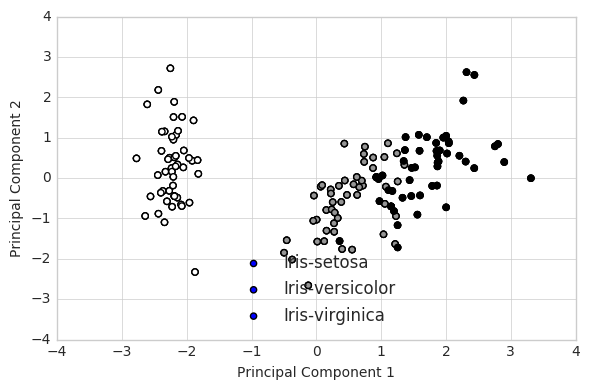

In [61]:
#Scattering data with Y_sklearn
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        #plt.scatter(Y_sklearn[y==lab, 0],   NOT Working
                    #Y_sklearn[y==lab, 1],
                    #label=lab,
                    #c=col)
        plt.scatter(Y_sklearn[:, 0],
                    Y_sklearn[:, 1],
                    label=lab,
                    c=irisData['class_codes'])  #class codes are 0, 1 and 2
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [62]:
#irisData.head()

In [63]:
Y_sklearn[:3]  #first 3 pairs of Y_sklearn

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731]])

C:\Users\Mnsh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


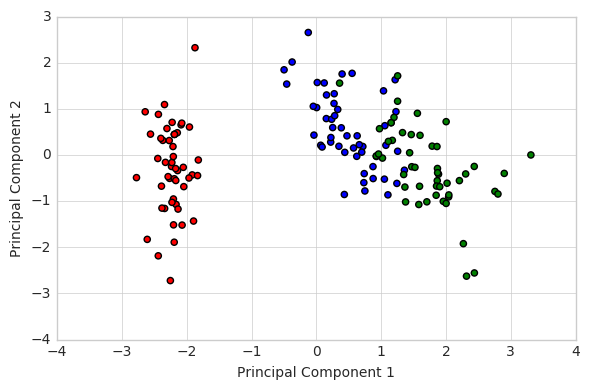

In [66]:

import matplotlib.patches as mpatches
Y = X_std.dot(matrix_w)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    
    plt.scatter(Y[:, 0],
                Y[:, 1],
                c=irisData['color_codes'])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    
    

C:\Users\Mnsh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


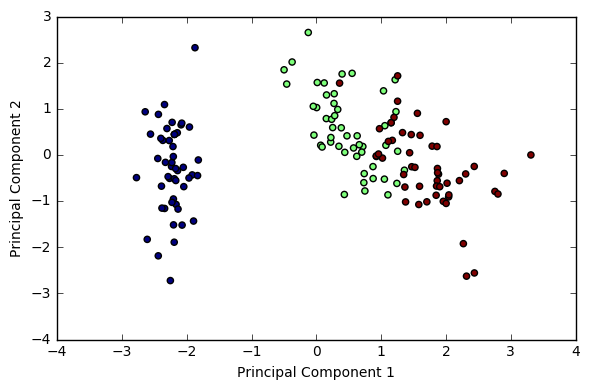

In [44]:
#same figure with different color codes
Y = X_std.dot(matrix_w)
#with plt.style.context('seaborn-whitegrid'):
plt.figure(figsize=(6, 4))

plt.scatter(Y[:, 0],
            Y[:, 1],
            c=irisData['class_codes'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#legend([b,c,d,e], ["b","c","d","e"], loc=1)
#plt.legend([0, 1, 2 ], ['x', 'y', 'z'], loc=1)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Summary: PCA is able to reduce the featres into 2 components with good seperation of classes